# Step 1: Importing Required Libraries

In [217]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading

In [221]:
dataset = pd.read_csv('crime_data.csv')
dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [222]:
dataset.shape

(50, 5)

In [252]:
dataset = dataset.rename(columns={'Unnamed: 0':'Area'})

In [223]:
# renaming column name.(labelling negative words..at the end will renamed to original labels)

dataset1 = dataset.rename(columns={'Unnamed: 0':'Area', 'Murder':'C1', 'Assault':'C2',
                                  'UrbanPop':'C3','Rape':'C4'})

In [224]:
dataset1.head()

,Area,C1,C2,C3,C4
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [225]:
# Checking labels in Area column 

dataset1.Area.nunique()

# OUTPUT SHOWS NO DUPLICATE COUNTS..

50

In [227]:
# Since Area is not required to set cluster. Since all are unique labels..

dataset1 = dataset1.drop(['Area'],axis=1)

In [8]:
dataset1.head()

,C1,C2,C3,C4
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# Step 2: Exploratory Data Analysis..

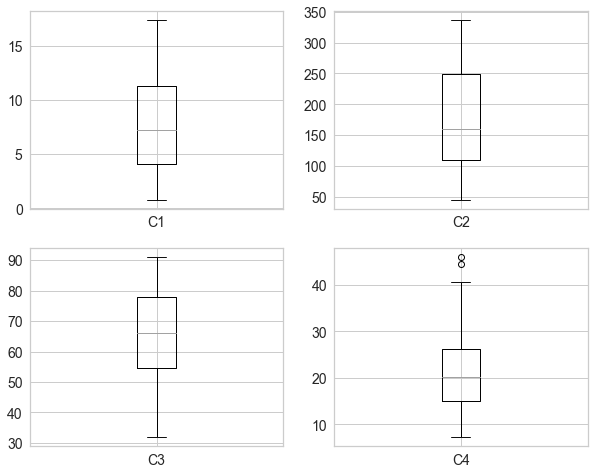

In [228]:
fig, (ax1,ax2) = plt.subplots(2,2, figsize=(10,8))

dataset1.boxplot(column='C1',ax=ax1[0],return_type='axes', fontsize=14)
dataset1.boxplot(column='C2',ax=ax1[1],return_type='axes',fontsize=14)
dataset1.boxplot(column='C3',ax=ax2[0],return_type='axes',fontsize=14)
dataset1.boxplot(column='C4',ax=ax2[1],return_type='axes',fontsize=14)
plt.show()

    Conclusion: 2 Outliers present in C4 plot.

In [229]:
# fINDING UPPER WISKER FOR C4 COLUMN SO TAHT WE CAN GET OUTLIERES EASILY.

Q1 = dataset1.C4.quantile(0.25)
Q3 = dataset1.C4.quantile(0.75)
IQR = Q3 - Q1
upper_wisker = Q3+1.5*IQR
print('"Upper Wisker for C4="',upper_wisker)

"Upper Wisker for C4=" 42.82499999999999


In [230]:
# Finding in which row number outliers present.

dataset1.loc[dataset1["C4"]>42.82]


,C1,C2,C3,C4
1,10.0,263,48,44.5
27,12.2,252,81,46.0


In [231]:
dataset1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
C1,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
C2,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
C3,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
C4,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


# Step 3: Transformation:

### StandardScalar & MinMaxScalar

In [232]:
# Applying Standardization since only two outliers in C4 columns. 
# So it will be better to apply Standardization. Also we will check with minmaxscalar.

In [233]:
# 1. Standardization

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
std_df = StandardScaler.fit_transform(dataset1)

In [234]:
# 2. MinMaxScalar

from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
minmax_df = MinMaxScaler.fit_transform(dataset1)

# Step 4: Principle Componenet Analysis.

In [235]:
# 1. Applying PCA on std_df

from sklearn.decomposition import PCA
PCA1 = PCA()
std_pca = PCA1.fit_transform(std_df)

In [236]:
# Checking experienced variance ratio:

print((PCA1.explained_variance_ratio_*100).round(2))


[62.01 24.74  8.91  4.34]


In [237]:
# Applying PCA on minmax_df

from sklearn.decomposition import PCA
PCA2 = PCA()
minmax_pca = PCA2.fit_transform(minmax_df)

In [238]:
# Checking experienced variance ratio:

print((PCA2.explained_variance_ratio_*100).round(2))

[64.27 22.8   8.1   4.82]


# Step 5: Clustering

# 5.1 KMeans Clustering:

### 5.1.1 How many Clusters..?

In [239]:
# Applying on std_pca

model1


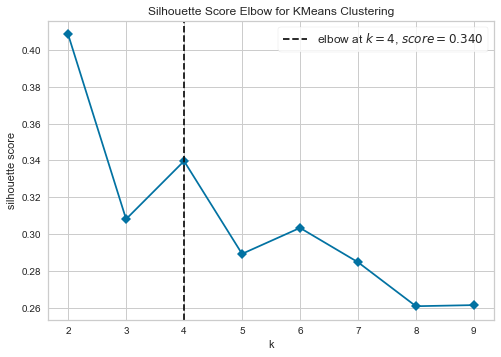

model2


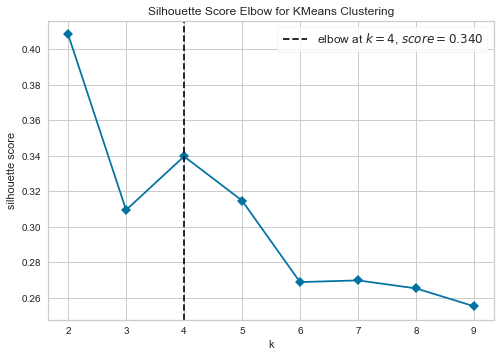

In [240]:
#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,n_jobs=-1,)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(std_pca)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(std_pca)    
visualizer2.poof()
plt.show()

In [241]:
# Applying on minmax_pca

model3


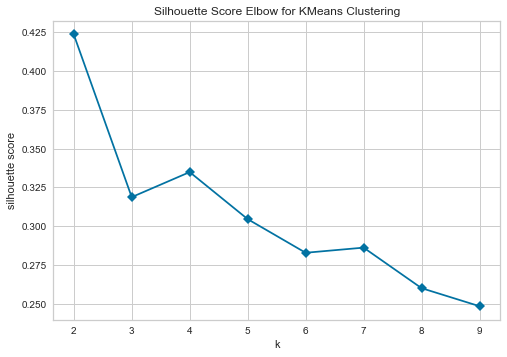

model4


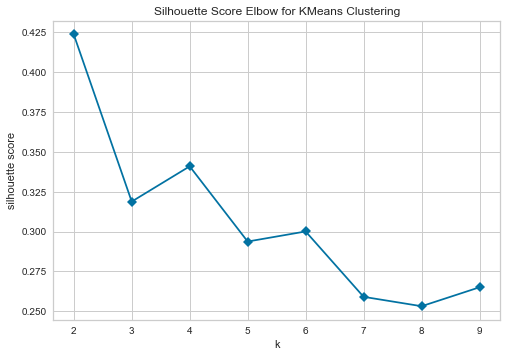

In [242]:
#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model3 = KMeans(random_state=0,n_jobs=-1,)
model4 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model3')
visualizer3.fit(minmax_pca)    
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(minmax_pca)    
visualizer4.poof()
plt.show()

Since silhoutte score max with std_pca 0.34 and it gives cluster numbers=4. So building model with the same.

### 5.1.2 Model Building..

In [243]:
from sklearn.cluster import KMeans

KMeans = KMeans(n_clusters =4, random_state= 0)
model = KMeans.fit_predict(std_pca)


In [244]:
KMeans.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

In [245]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

KMeans.inertia_

57.55425863091108

In [246]:
# Cluster centers..

KMeans.cluster_centers_

array([[ 1.06107315,  1.47733019, -0.39655882,  0.16093813],
       [ 1.89265608, -0.36195062,  0.25777029, -0.11217339],
       [-0.47216139, -0.74287122, -0.16368685,  0.02067638],
       [-1.96450246,  0.36712739,  0.18772664, -0.01231332]])

In [247]:
# Checking cluster score:
# https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

from sklearn.metrics import silhouette_score
sil_score_kmeans = silhouette_score(std_pca, KMeans.labels_, metric='euclidean').round(2)
sil_score_kmeans

0.34

### 5.1.3 Visualizing Clusters..

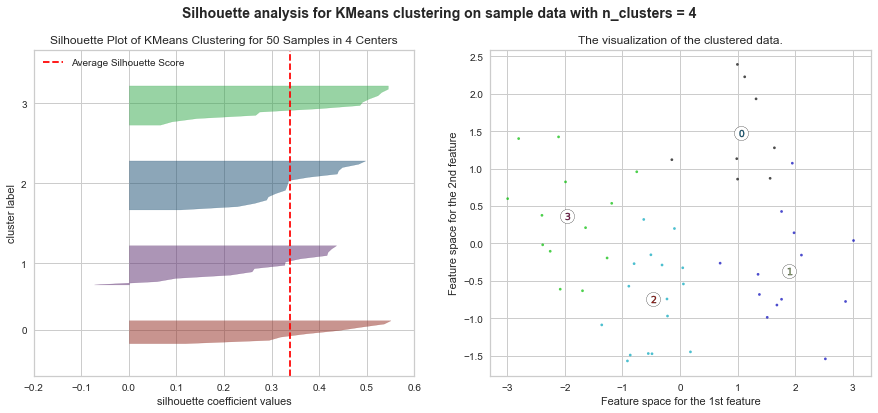

In [248]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer = SilhouetteVisualizer(KMeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer.fit(std_pca)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors = cm.nipy_spectral(KMeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_pca[:, 0], std_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = KMeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer.show()
plt.show()


In [253]:
# Creating dataframe of cluster lables..

model_cluster = pd.DataFrame(KMeans.labels_.copy(), columns=['Kmeans_Clustering'])

In [261]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([dataset.copy(), model_cluster], axis=1)
Kmeans_df.head()

,Area,Murder,Assault,UrbanPop,Rape,Kmeans_Clustering
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [265]:
k_comparision_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
k_comparision_df

,Area,Murder,Assault,UrbanPop,Rape
Kmeans_Clustering,,,,,
0,8,8,8,8,8
1,13,13,13,13,13
2,16,16,16,16,16
3,13,13,13,13,13


This is crime number count based on the cluster group this will gives idea for which area need to focus more to reduce crime rate.

## 5.2 Hierarchical Clustering

### 5.2.1 Deciding How many numbers of clusters..

In [168]:
# method 1:

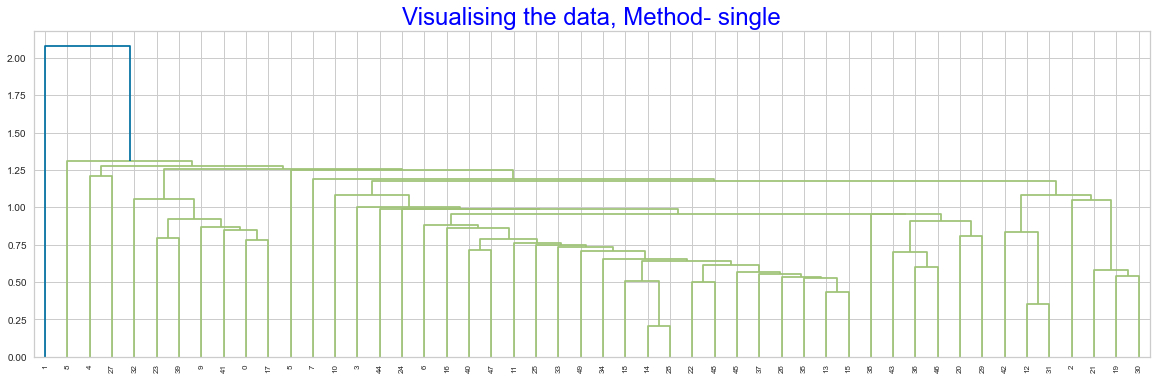

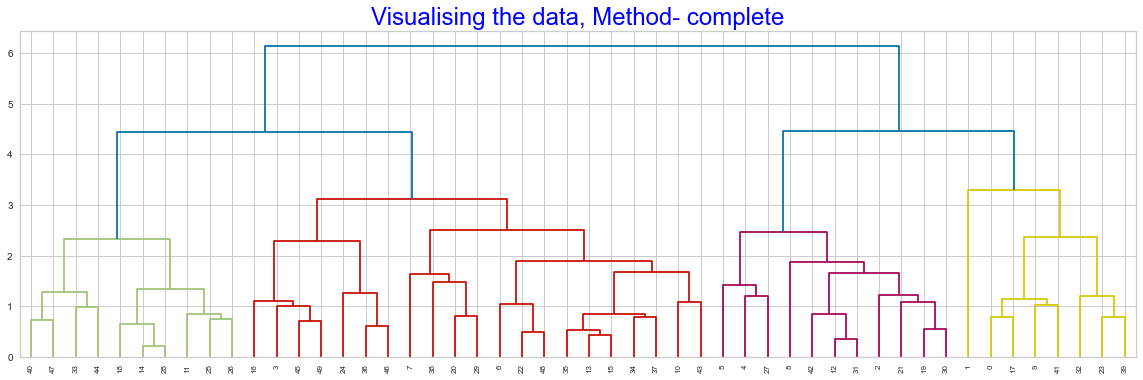

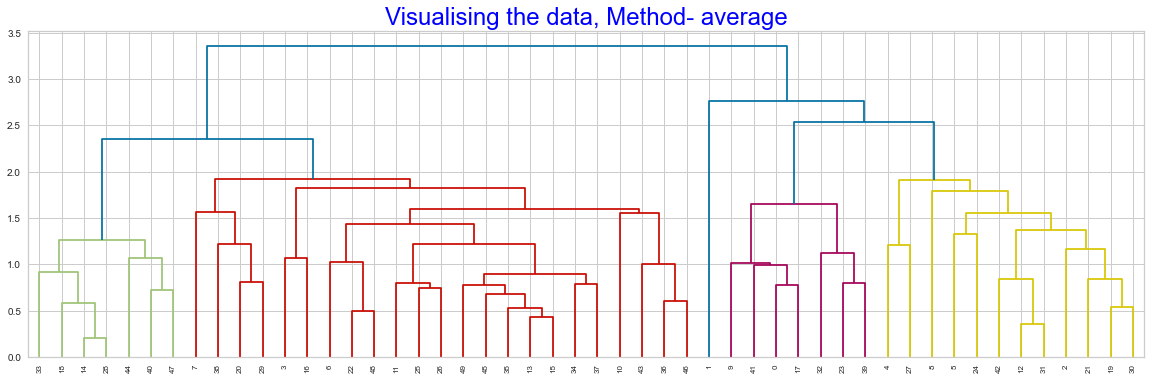

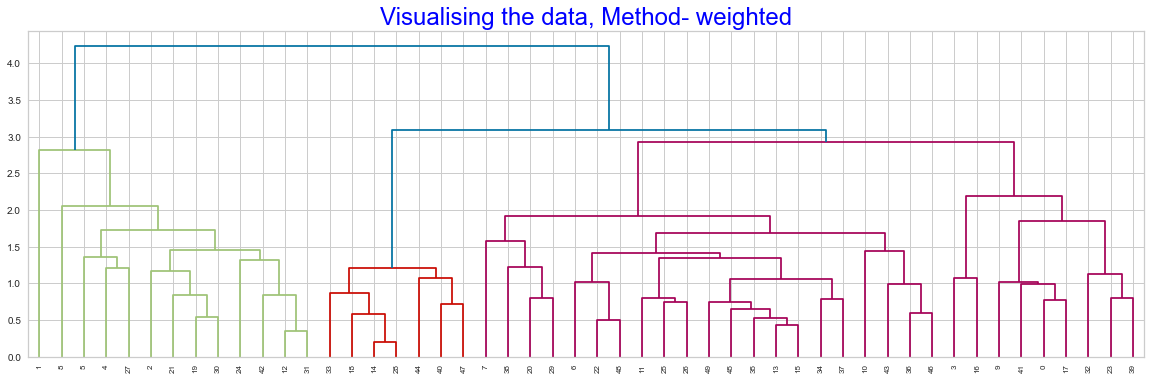

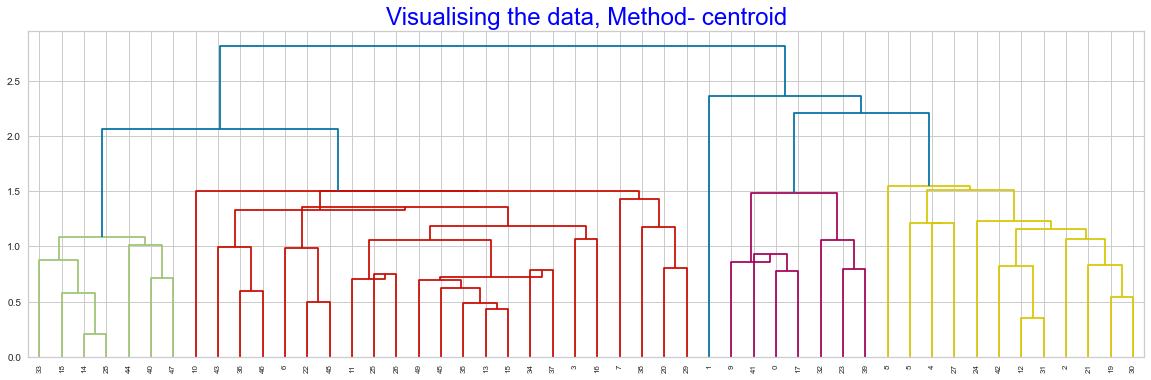

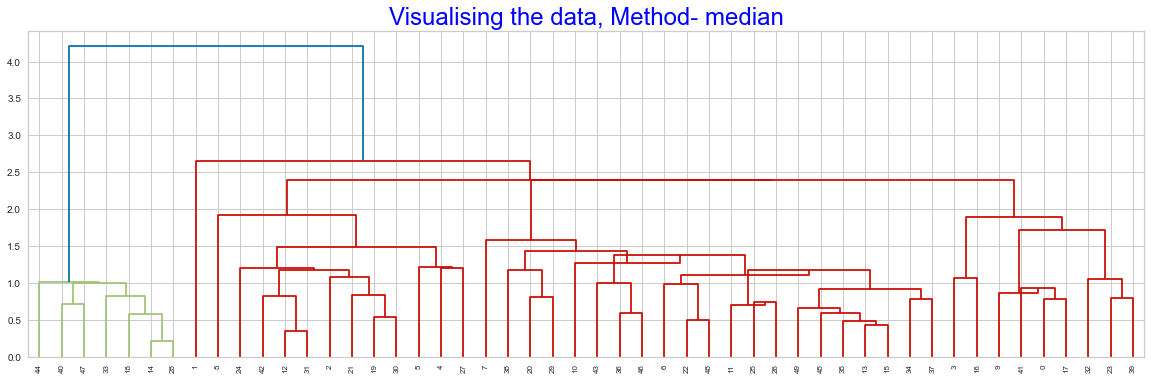

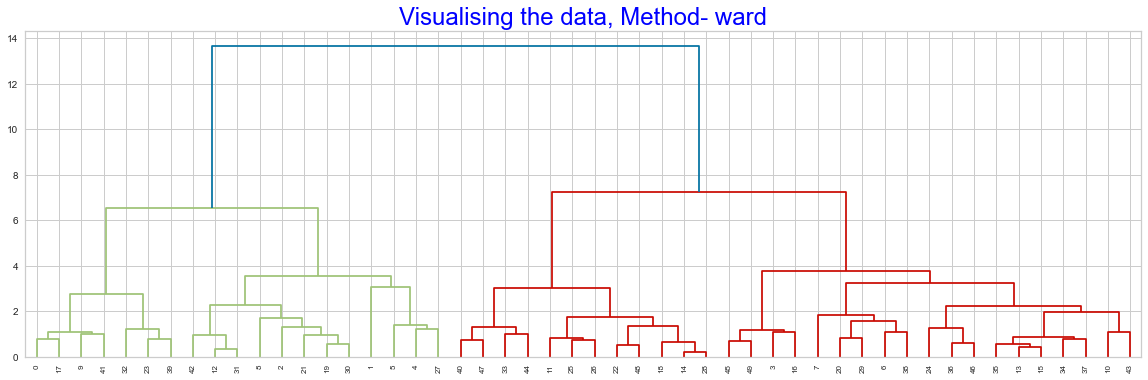

In [164]:
import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = shc.dendrogram(shc.linkage(std_pca, method = methods,optimal_ordering=False))

In [ ]:
# method 2:

In [167]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_pca)
        silhouette_score1 = silhouette_score(std_pca, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.40479445025195704
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.40479445025195704
For n_clusters = 2 The average silhouette_score with linkage- average : 0.40848903262176434
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159765

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027906
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3486367919047618
For n_clusters = 3 The average silhouette_score with linkage- single : 0.1458234362517025

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164554
For n_clusters = 4 The average silhouette_score with linkage- average : 0.363681942015122

### 5.2.2 Building Model

In [170]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
y_pred_hie = agg_clustering.fit_predict(std_pca)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [183]:
# Cluster numbers

hie_cluster_no = agg_clustering.n_clusters_
hie_cluster_no

4

In [172]:
# cluster labels for each point

agg_clustering.labels_

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [173]:
# Number of leaves in the hierarchical tree.

agg_clustering.n_leaves_

50

In [174]:
# The estimated number of connected components in the graph.

agg_clustering.n_connected_components_

1

In [175]:
# The children of each non-leaf node. Values less than n_samples correspond to leaves of 
#......the tree which are the original samples. A node i greater than or equal to n_samples 
#.........is a non-leaf node and has children children_[i - n_samples]. Alternatively at the 
#...........i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i

agg_clustering.children_

array([[14, 28],
       [12, 31],
       [13, 15],
       [22, 48],
       [35, 52],
       [19, 30],
       [18, 50],
       [36, 46],
       [45, 54],
       [40, 47],
       [25, 26],
       [ 0, 17],
       [49, 58],
       [34, 37],
       [23, 39],
       [11, 60],
       [20, 29],
       [21, 55],
       [42, 51],
       [62, 63],
       [33, 56],
       [41, 61],
       [43, 57],
       [ 9, 71],
       [ 6, 53],
       [ 3, 16],
       [44, 59],
       [32, 64],
       [ 2, 67],
       [ 4, 27],
       [65, 69],
       [38, 66],
       [70, 76],
       [ 5, 24],
       [68, 78],
       [74, 80],
       [83, 84],
       [10, 72],
       [ 7, 81],
       [85, 87],
       [73, 77],
       [ 8, 86],
       [75, 89],
       [79, 91],
       [88, 92],
       [82, 94],
       [90, 93],
       [ 1, 96],
       [95, 97]])

In [186]:
# Clustering Score

sil_score_hie = silhouette_score(std_pca, agg_clustering.labels_).round(3)
sil_score_hie

0.364

In [263]:
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['hie_Clustering'])

In [268]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([dataset.copy(), hie_cluster], axis=1)
hie_df.head()

,Area,Murder,Assault,UrbanPop,Rape,hie_Clustering
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [266]:
h_comparision_df = hie_df.groupby(['hie_Clustering']).count()
h_comparision_df

,Area,Murder,Assault,UrbanPop,Rape
hie_Clustering,,,,,
0,30,30,30,30,30
1,12,12,12,12,12
2,1,1,1,1,1
3,7,7,7,7,7


 ### Conclusion: 

1. Since the silhouette_score of hierarchical clustering(average linkage) is max. than KMeans clustering. So will considering hierarchical cluster


2. Also if we observe the cluster components KMeans gives approx equal number of crime rate in three cluster wheras hierarchical clustering grouped clearly which is best to identify.(the choice may varries..based on practical approach)